# Example of correctly formatting data

For use in decoding (see "Examples_all_decoders" and "Examples_kf_decoder"), we need the following format of inputs:
- Neural data should be a matrix of size "number of time bins" x "number of neurons", where each entry is the firing rate of a given neuron in a given time bin
- The output you are decoding should be a matrix of size "number of time bins" x "number of features you are decoding"

In this example, we load Matlab data that contains 
- The spike times of all neurons. In Matlab, "spike_times" is a cell of size "number of neurons" x 1. Within spike_times{i} is a vector containing all the spike times of neuron i.
- A continuous stream of the output variables. In this example, we are aiming to decode velocity. In Matlab, "vels" is a matrix of size "number of recorded time points" x 2 (x and y velocities were recorded) that contains the x and y velocity components at all time points. "vel_times" is a vector that states the time at all recorded time points. 

We will put this data in the format described above, with the help of the functions "bin_spikes" and "bin_output" that are in the file "preprocessing_funcs.py"




## Import packages and functions

In [1]:
###Import standard packages###
import numpy as np
from scipy import io

###Import functions for binning data for preprocessing###
from Neural_Decoding.preprocessing_funcs import bin_spikes
from Neural_Decoding.preprocessing_funcs import bin_output

Using TensorFlow backend.


## Load Data
The data for this example can be downloaded at this [link](https://www.dropbox.com/sh/n4924ipcfjqc0t6/AACPWjxDKPEzQiXKUUFriFkJa?dl=0&preview=s1_data_raw.mat)

It was recorded by Raeed Chowdhury from Lee Miller's lab at Northwestern.

In [3]:
###Load Data###
folder='miller_lab_data/' #ENTER THE FOLDER THAT YOUR DATA IS IN
# folder='/Users/jig289/Dropbox/MATLAB/Projects/In_Progress/BMI/Processed_Data/' 
data=io.loadmat(folder+'s1_data_raw.mat')
spike_times=data['spike_times'] #Load spike times of all neurons
vels=data['vels'] #Load x and y velocities
vel_times=data['vel_times'] #Load times at which velocities were recorded

## User Inputs

In [15]:
dt=.05 #Size of time bins (in seconds)
t_start=vel_times[0] #Time to start extracting data - here the first time velocity was recorded
t_end=vel_times[-1]  #Time to finish extracting data - here the last time velocity was recorded
downsample_factor=1  #Downsampling of output (to make binning go faster). 1 means no downsampling.

## Put data in binned format

In [16]:
#When loading the Matlab cell "spike_times", Python puts it in a format with an extra unnecessary dimension
#First, we will put spike_times in a cleaner format: an array of arrays
spike_times=np.squeeze(spike_times)
for i in range(spike_times.shape[0]):
    spike_times[i]=np.squeeze(spike_times[i])

In [17]:
###Preprocessing to put spikes and output in bins###

#Bin neural data using "bin_spikes" function
neural_data=bin_spikes(spike_times,dt,t_start,t_end)

#Bin output (velocity) data using "bin_output" function
vels_binned=bin_output(vels,vel_times,dt,t_start,t_end,downsample_factor)

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

In [51]:
neural_data.shape[1]

52

Showing 10 random neurons


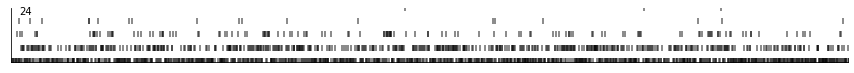

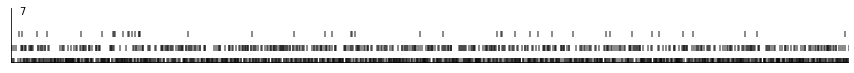

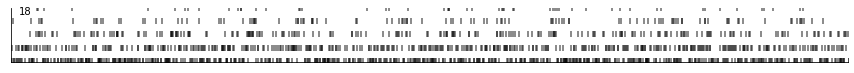

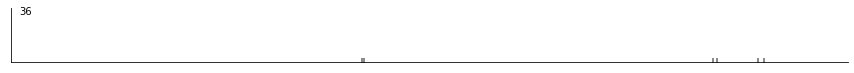

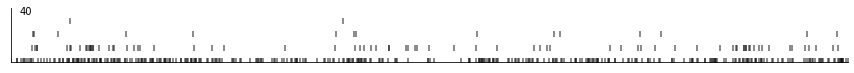

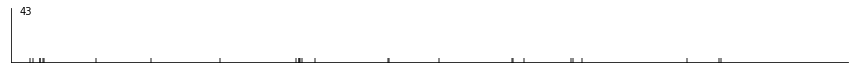

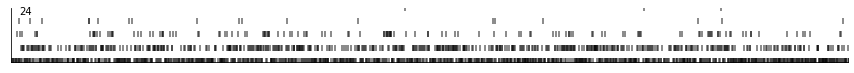

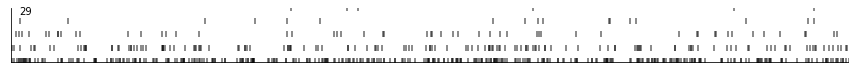

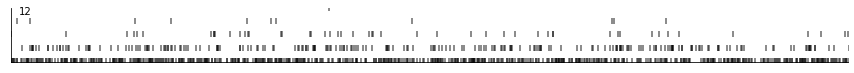

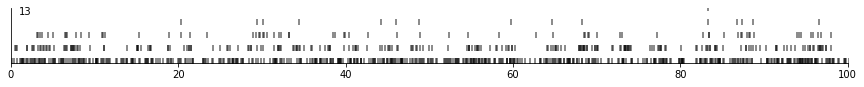

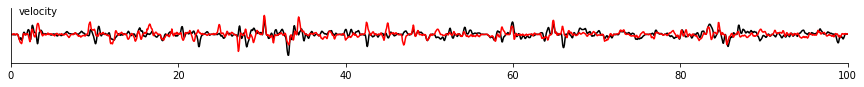

In [106]:
print('Showing 10 random neurons')
for i in range(10):
    neuron2plot = np.random.randint(0,neural_data.shape[1])
    data2plot = neural_data[:,neuron2plot]
    figure = plt.figure(figsize=(15,1))
    ax = figure.add_subplot(111)
    ax.scatter((np.arange(len(data2plot))*dt)[data2plot>0], data2plot[data2plot>0], marker='|',color='k', alpha=.6)
    ax.text(1,4.5,f'{neuron2plot}')
    ax.set_ylim(0.9,5)
    ax.set_xlim(0,100)
    ax.get_yaxis().set_ticks([])

    if i != 9:
        ax.get_xaxis().set_ticks([])
    sns.despine()
    plt.show()
    
# Plot velocity underneath
figure = plt.figure(figsize=(15,1))
ax = figure.add_subplot(111)
ax.plot((np.arange(len(vels_binned))*dt), vels_binned[:,0], color='k')
ax.plot((np.arange(len(vels_binned))*dt), vels_binned[:,1], color='r')
ax.set_xlim(0,100)
ax.text(1,45,f'velocity')
ax.get_yaxis().set_ticks([])
sns.despine()

## Save Data

In [18]:
import pickle

data_folder= folder #FOLDER YOU WANT TO SAVE THE DATA TO

with open(data_folder+'example_data_s1.pickle','wb') as f:
    pickle.dump([neural_data,vels_binned],f)